# Feature Selection
In the field of machine learning, feature selection plays a crucial role in improving model performance, reducing computational complexity, and enhancing interpretability. Feature selection involves identifying the most relevant and informative features from a given dataset.

The goal of feature selection is to improve the performance of a machine learning model by reducing the dimensionality of the input data and removing irrelevant or redundant features.

## Filter Methods
The filter method uses statistical measures to assess the relevance of features independently of any machine learning algorithm. 

A subset of features is selected based on their relationship to the target variable. The selection is not dependent of any machine learning algorithm. 

You can use the following table for reference:

|    X \ Y  |     Continuous       |Categorical|
|:---------:|:--------------------:|:---------:|
|Continuous |Pearson's Correlation |    LDA    |
|Categorical|   Anova              |Chi-Squared|


### Pearson’s Correlation

A statistic that measures the linear correlation between two variables, which are both continuous. It varies from -1 to +1, where +1 corresponds to positive linear correlation, 0 to no linear correlation, and −1 to negative linear correlation.

$${\displaystyle \rho _{X,Y}={\frac {\operatorname {cov} (X,Y)}{\sigma _{X}\sigma _{Y}}}}$$

now lets test it in a real world data.

In [1]:
import pandas as pd

file_path = "../data/BostonHousing.csv"
data = pd.read_csv(file_path)

data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


<Axes: >

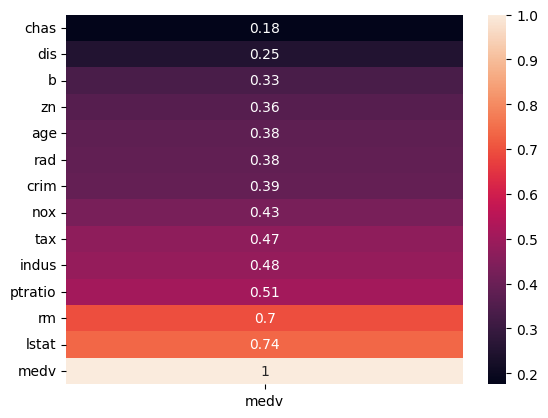

In [18]:
import seaborn as sns

correlations = data.corr().loc[['medv']].T.abs().sort_values(by="medv")
sns.heatmap(correlations, annot=True)

Correlation coefficients whose magnitude are between 0.5 and 0.7 indicate variables which can be considered moderately correlated, thus we set the threshold value to 0.5.

In [45]:
correlated_features = data.corr()['medv'][abs(data.corr()['medv']) > 0.5]
correlated_features

rm         0.695360
ptratio   -0.507787
lstat     -0.737663
medv       1.000000
Name: medv, dtype: float64

From the 13 features, there are only 3 that strongly correlate with the target (relevant features); RM, PTRATIO and LSTAT. However, we have only checked the correlation of each individual feature with the output variable. Since many algorithms, like Linear Regression, assume that the input features are uncorrelated, we must calculate the pearson’s r between those top 3 features.

<Axes: >

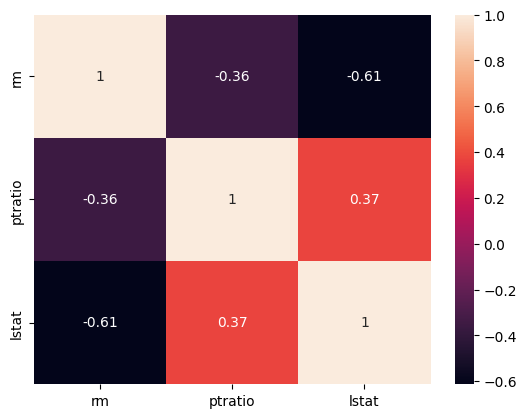

In [46]:
sns.heatmap(data.corr().loc[['rm', 'ptratio', 'lstat'], ['rm', 'ptratio', 'lstat']], annot=True)

RM and LSTAT are correlated with each other, thus we choose one of them (dropping ie RM is equivalent to removing redundant features). Since the correlation between LSTAT with target variable MEDV is higher than with RM, we select LSTAT.

### LDA
Linear Discriminant Analysis is a supervised linear algorithm that projects the data into a smaller subspace k, the model finds linear combinations of the features that achieve maximum separability between the classes and minimum variance within each class.

let's test it out.

In [4]:
import pandas as pd

file_path = "../data/BreastCancerWisconsin(Diagnostic).csv"
data = pd.read_csv(file_path)
data.drop("Unnamed: 32", axis=1, inplace=True)
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [12]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = data.loc[:,'diagnosis']
X = data.drop('diagnosis', axis=1)

y = le.fit_transform(y)

In [13]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline
import numpy as np

steps = [('lda', LinearDiscriminantAnalysis()), ('m', LogisticRegression(C=10))]

model = Pipeline(steps=steps)


cv = StratifiedKFold(n_splits=5)
n_scores_lda = cross_val_score(model, X, y, scoring='f1_macro', cv=cv, n_jobs=-1)
model = LogisticRegression(C=10)
n_scores = cross_val_score(model, X, y, scoring='f1_macro', cv=cv, n_jobs=-1)

print('f1-score (macro)\n')
print('With LDA: %.2f' % np.mean(n_scores_lda))
print('Without LDA: %.2f' % np.mean(n_scores))

f1-score (macro)

With LDA: 0.97
Without LDA: 0.36


### Anova
Analysis of Variance is a statistical method that tests whether different input categories have significantly different values for the output variable. The `f_classif` method from sklearn allows for the analysis of multiple groups of data to determine the variability between samples and within samples, in order to gain information about the relationship between the dependent and independent variables.

In [47]:
file_path = "../data/UCI-Adult.csv"
data = pd.read_csv(file_path)

data.replace('?', pd.NA, inplace=True)
data.dropna(inplace=True)
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [48]:
from sklearn.preprocessing import LabelEncoder

for column in data.select_dtypes('object').columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])


X = data.drop('income', axis=1)
y = data['income']

In [54]:
from sklearn.feature_selection import f_classif, SelectKBest
fs = SelectKBest(score_func=f_classif, k=5)

X_new = fs.fit_transform(X, y)

We can fine tune the number of selected features by performing Grid-Search with k-fold Cross Validation

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45222 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             45222 non-null  float64 
 1   workclass       45222 non-null  category
 2   fnlwgt          45222 non-null  float64 
 3   education       45222 non-null  category
 4   education-num   45222 non-null  float64 
 5   marital-status  45222 non-null  category
 6   occupation      45222 non-null  category
 7   relationship    45222 non-null  category
 8   race            45222 non-null  category
 9   sex             45222 non-null  category
 10  capital-gain    45222 non-null  float64 
 11  capital-loss    45222 non-null  float64 
 12  hours-per-week  45222 non-null  float64 
 13  native-country  45222 non-null  category
 14  class           45222 non-null  category
dtypes: category(9), float64(6)
memory usage: 2.8 MB


In [2]:
from sklearn.datasets import fetch_openml
import pandas as pd

data = fetch_openml(name='adult', version=2, as_frame=True, parser='auto')
data = data.frame

data.replace('?', pd.NA, inplace=True)
data.dropna(inplace=True)
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45222 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             45222 non-null  int64   
 1   workclass       45222 non-null  category
 2   fnlwgt          45222 non-null  int64   
 3   education       45222 non-null  category
 4   education-num   45222 non-null  int64   
 5   marital-status  45222 non-null  category
 6   occupation      45222 non-null  category
 7   relationship    45222 non-null  category
 8   race            45222 non-null  category
 9   sex             45222 non-null  category
 10  capital-gain    45222 non-null  int64   
 11  capital-loss    45222 non-null  int64   
 12  hours-per-week  45222 non-null  int64   
 13  native-country  45222 non-null  category
 14  class           45222 non-null  category
dtypes: category(9), int64(6)
memory usage: 2.8 MB


Now lets encode these categories columns

In [6]:
from sklearn.preprocessing import LabelEncoder


for column in data.select_dtypes('category').columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])


X = data.drop('class', axis=1)
y = data['class']

y = LabelEncoder().fit_transform(y)

in here we are gonna check each k (for best Anova test) to find the best number using GridSearchCV.

for now you don't need to know anything about logistic regression we just want to find the best k for ANOVA test.

In [7]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import f_classif, SelectKBest


fs = SelectKBest(score_func=f_classif, k=5)
lr = LogisticRegression(solver='liblinear', max_iter=1000)

cv = StratifiedKFold(n_splits=5)


pipeline = Pipeline(steps=[('anova', fs), ('lr', lr)])

params = {'anova__k': [i for i in range(1, X.shape[1] + 1)]}

search = GridSearchCV(pipeline, params, scoring='accuracy', n_jobs=-1, cv=cv)
results = search.fit(X, y)

print('Best k: %s' % results.best_params_)

Best k: {'anova__k': 13}


### Chi-squared
Chi-squared tests whether the occurrences of a specific feature and a specific class are independent using their frequency distribution.
When selecting features, we wish to extract those that are highly dependent on the output.

In [12]:
file_path = "../data/Dream-Housing-Finance.csv"
data = pd.read_csv(file_path)

# irrelevant feature
data.drop('Loan_ID', axis=1, inplace=True)

data['Loan_Amount_Term'] = data['Loan_Amount_Term'].astype('object')
data['Credit_History'] = data['Credit_History'].astype('object')

data.dropna(inplace = True)
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [14]:
categorical_columns = data.select_dtypes(exclude='number').drop('Loan_Status', axis=1).columns

In [17]:
from sklearn.feature_selection import chi2, SelectKBest


X = data[categorical_columns].apply(LabelEncoder().fit_transform)
y = LabelEncoder().fit_transform(data['Loan_Status'])

fs = SelectKBest(score_func=chi2, k=5)
X_kbest = fs.fit_transform(X, y)

and thats how we use chi2 test, Like ANOVA!